In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rafifaditio/Dataset/main/BMR.csv')

In [ ]:
def BMR_pria(bb, tb, u):
  hasil = 66 + (13.7*bb) + (5*tb) - (6.8*u)
  return hasil

def BMR_wanita(bb, tb, u):
  hasil = 655 + (9.6*bb) + (1.8*tb) - (4.7*u)
  return hasil

In [ ]:
BMR_wanita(bb=65, tb=160, u=25)

1449.5

In [ ]:
df.head(5)

,Age,Gender,Height (cm),Weight (kg),Index
0,21,Male,162,58,2
1,44,Female,188,80,2
2,45,Male,177,61,2
3,50,Male,192,101,3
4,28,Female,195,61,1


In [ ]:
# kolom gender -> df.iloc[:, 1]
# kolom berat badan -> df.iloc[:, 3]
# kolom tinggi badan -> df.iloc[:, 2]
# kolom usia -> df.iloc[:, 0]

df.loc[:, 'Gender']

0        Male
1      Female
2        Male
3        Male
4      Female
        ...  
145      Male
146    Female
147      Male
148    Female
149      Male
Name: Gender, Length: 150, dtype: object

In [ ]:
# loop menggunakan .loc
bmr_loc = []

for idx in range(0, df.shape[0]):
  if df.loc[idx, 'Gender'] == 'Male':
    result = BMR_pria(bb=df.loc[idx, 'Weight (kg)'], tb=df.loc[idx, 'Height (cm)'], u=df.loc[idx, 'Age'])
    bmr_loc.append(result)
  elif df.loc[idx, 'Gender'] == 'Female':
    result = BMR_wanita(bb=df.loc[idx, 'Weight (kg)'], tb=df.loc[idx, 'Height (cm)'], u=df.loc[idx, 'Age'])
    bmr_loc.append(result)

In [ ]:
# loop menggunakan .iloc
bmr = []

for idx in range(0, df.shape[0]):
  if df.iloc[idx, 1] == 'Male':
    result = BMR_pria(bb=df.iloc[idx, 3], tb=df.iloc[idx, 2], u=df.iloc[idx, 0])
    bmr.append(result)
  elif df.iloc[idx, 1] == 'Female':
    result = BMR_wanita(bb=df.iloc[idx, 3], tb=df.iloc[idx, 2], u=df.iloc[idx, 0])
    bmr.append(result)

In [ ]:
df['BMR'] = bmr
df['BMR2'] = bmr_loc

In [ ]:
df

,Age,Gender,Height (cm),Weight (kg),Index,BMR,BMR2
0,21,Male,162,58,2,1527.8,1527.8
1,44,Female,188,80,2,1554.6,1554.6
2,45,Male,177,61,2,1480.7,1480.7
3,50,Male,192,101,3,2069.7,2069.7
4,28,Female,195,61,1,1460.0,1460.0
...,...,...,...,...,...,...,...
145,33,Male,142,71,4,1524.3,1524.3
146,32,Female,162,58,2,1353.0,1353.0
147,29,Male,174,54,1,1478.6,1478.6
148,33,Female,197,72,2,1545.7,1545.7


In [ ]:
df[(df['Gender']=='Male') &
   (df['Age']>=24) &
   (df['Age']<=35)]['Weight (kg)'].mean()

86.41176470588235

In [ ]:
df_trial = df.copy()
df_trial.drop(index=[2, 5, 7], inplace=True)
df_trial.reset_index(drop=True, inplace=True)
df_trial.head(7)

,Age,Gender,Height (cm),Weight (kg),Index,BMR,BMR2
0,21,Male,162,58,2,1527.8,1527.8
1,44,Female,188,80,2,1554.6,1554.6
2,50,Male,192,101,3,2069.7,2069.7
3,28,Female,195,61,1,1460.0,1460.0
4,20,Female,188,115,4,2003.4,2003.4
5,48,Male,174,107,4,2075.5,2075.5
6,29,Male,182,70,2,1737.8,1737.8


In [ ]:
# loop menggunakan .loc
bmr_loc = []

for idx in range(0, df_trial.shape[0]):
  if df_trial.loc[idx, 'Gender'] == 'Male':
    result = BMR_pria(bb=df_trial.loc[idx, 'Weight (kg)'], tb=df_trial.loc[idx, 'Height (cm)'], u=df_trial.loc[idx, 'Age'])
    bmr_loc.append(result)
  elif df_trial.loc[idx, 'Gender'] == 'Female':
    result = BMR_wanita(bb=df_trial.loc[idx, 'Weight (kg)'], tb=df_trial.loc[idx, 'Height (cm)'], u=df_trial.loc[idx, 'Age'])
    bmr_loc.append(result)

Perkenalan

Nama : Rafif 
Batch: 013

Pada notebook ini akan dilakukan ... menggunakan dataset ...

Objective pada penelitian kali ini adalah untuk Eksplorasi pokemon terkuat dari generasi 3 keatas.

Perumusan masalah:
- Pokemon terkuat dari generasi 3, 4, 5, 6
- Pokemon Dengan Attack tertinggi di generasi 3, 4, 5, 6
- Tipe pokemon terkuat di generasi 3, 4, 5, 6


In [ ]:
df_p = pd.read_csv('/content/Pokemon.csv')
df_p

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
df_p[df_p['#'].duplicated()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True


In [ ]:
df_p[df_p['Name'].str.contains("Mega")]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,115,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False


In [ ]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
df_p.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
df_p['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

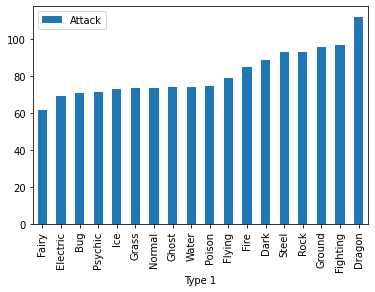

In [ ]:
df_p.groupby(by=df_p['Type 1'])[['Attack']].mean().sort_values(by='Attack').plot(kind='bar')

Berdasarakan visualisasi diatas, 3 pokemon type 1 dengan rata-rata terbesar ialah Dragon, fighting, etc

In [ ]:
df_p.groupby(by='Type 1')['Attack'].mean()

Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64

In [ ]:
df_p.groupby(by='Name')['Attack'].mean()

Name
Abomasnow                   92.0
AbomasnowMega Abomasnow    132.0
Abra                        20.0
Absol                      130.0
AbsolMega Absol            150.0
                           ...  
Zoroark                    105.0
Zorua                       65.0
Zubat                       45.0
Zweilous                    85.0
Zygarde50% Forme           100.0
Name: Attack, Length: 800, dtype: float64

In [ ]:
df_p[['Name', 'Attack']].sort_values(by='Name')

,Name,Attack
510,Abomasnow,92
511,AbomasnowMega Abomasnow,132
68,Abra,20
392,Absol,130
393,AbsolMega Absol,150
...,...,...
632,Zoroark,105
631,Zorua,65
46,Zubat,45
695,Zweilous,85


Berdasarkan penelusuran/pengerjaan yang telah dilakukan, ditemukan:
- pokemon terkuat ....
- tipe terkuat ...